In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as plotly 
import plotly.express as xp

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
nummeric_columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

In [4]:
data.shape

(8523, 12)

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.Item_Weight.replace(np.nan,data.Item_Weight.mean(),inplace=True)

In [8]:
data.Outlet_Size.replace(np.nan,'Others',inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data.Item_Fat_Content.replace(['Low Fat', 'low fat'], ['LF','LF'],inplace=True)
data.Item_Fat_Content.replace(['reg','Regular'], ['Reg','Reg'],inplace=True)

In [11]:
data.Item_Fat_Content.value_counts()

LF     5517
Reg    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
data.Outlet_Size.value_counts()

Medium    2793
Others    2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [16]:
X = data.iloc[:,0:-1]

In [17]:
y = data.iloc[:,-1]

In [18]:
X_new = pd.DataFrame()

In [19]:
Item_Fat = pd.get_dummies(X.Item_Fat_Content)
Item_Fat

,LF,Reg
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
8518,1,0
8519,0,1
8520,1,0
8521,0,1


In [20]:
columns = Item_Fat.columns
for i in columns:
    X_new[i]=Item_Fat[i]
X_new

,LF,Reg
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
8518,1,0
8519,0,1
8520,1,0
8521,0,1


In [21]:
Item_Type = pd.get_dummies(X.Item_Type)
Item_Type

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
columns = Item_Type.columns
for i in columns:
    X_new[i]=Item_Type[i]
X_new

,LF,Reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
Outlet_Location_Type = pd.get_dummies(X.Outlet_Location_Type)
Outlet_Location_Type

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
8518,0,0,1
8519,0,1,0
8520,0,1,0
8521,0,0,1


In [24]:
columns = Outlet_Location_Type.columns
for i in columns:
    X_new[i]=Outlet_Location_Type[i]
X_new

,LF,Reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8519,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
Outlet_Type = pd.get_dummies(X.Outlet_Type)
Outlet_Type

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [26]:
columns = Outlet_Type.columns
for i in columns:
    X_new[i]=Outlet_Type[i]
X_new

,LF,Reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [27]:
X_new.columns

Index(['LF', 'Reg', 'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Tier 1', 'Tier 2',
       'Tier 3', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [28]:
for i in nummeric_columns:
    X_new[i]=X[i]
X_new

,LF,Reg,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9.300,0.016047,249.8092,1999
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.920,0.019278,48.2692,2009
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.500,0.016760,141.6180,1999
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,19.200,0.000000,182.0950,1998
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.930,0.000000,53.8614,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,6.865,0.056783,214.5218,1987
8519,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,8.380,0.046982,108.1570,2002
8520,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,10.600,0.035186,85.1224,2004
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,7.210,0.145221,103.1332,2009


<AxesSubplot:>

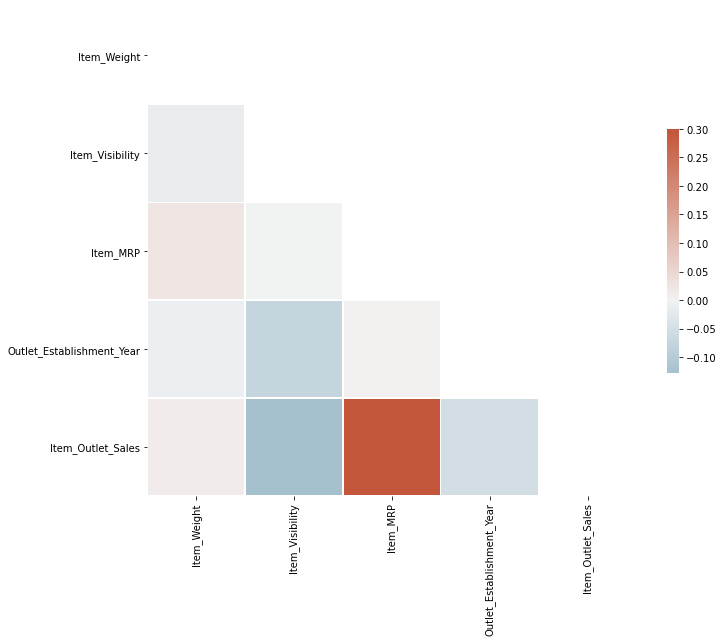

In [29]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_new = scaler.fit_transform(X_new)

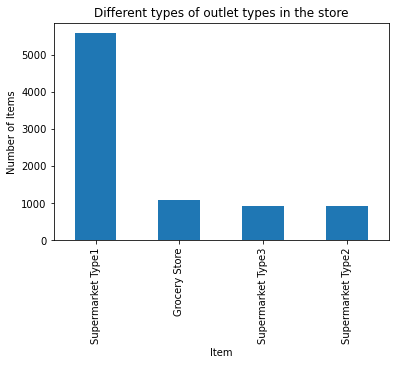

In [39]:
# we will analyze only the training set

X['Outlet_Type'].value_counts(normalize = True)
X['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

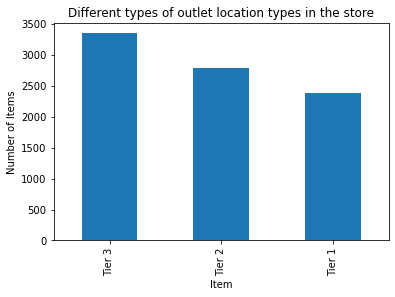

In [40]:
X['Outlet_Location_Type'].value_counts(normalize = True)
X['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

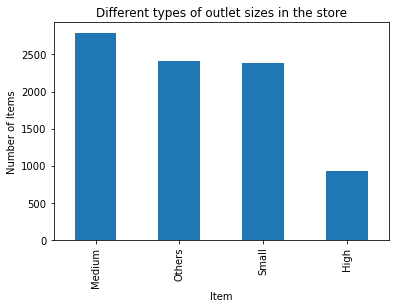

In [41]:
X['Outlet_Size'].value_counts(normalize = True)
X['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

Feature 0: 6.829231
Feature 1: 6.829231
Feature 2: 12.135176
Feature 3: 1.037326
Feature 4: 0.809446
Feature 5: 0.629297
Feature 6: 0.338106
Feature 7: 0.558287
Feature 8: 9.180903
Feature 9: 0.045978
Feature 10: 4.932381
Feature 11: 0.181210
Feature 12: 0.022571
Feature 13: 4.362567
Feature 14: 0.281061
Feature 15: 3.785067
Feature 16: 6.270077
Feature 17: 1.252131
Feature 18: 85.506858
Feature 19: 22.614048
Feature 20: 15.130230
Feature 21: 1286.384798
Feature 22: 68.642558
Feature 23: 6.554462
Feature 24: 675.375982
Feature 25: 1.168031
Feature 26: 101.601021
Feature 27: 3012.132993
Feature 28: 16.437439


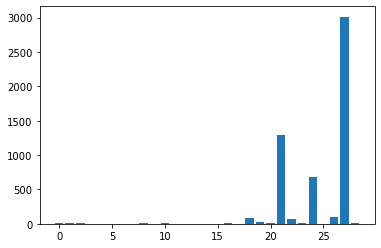

In [31]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all',)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=5)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

0.5609601452769646
833.5758455185359
1134.9568502943278
Result : 0.562483219985752


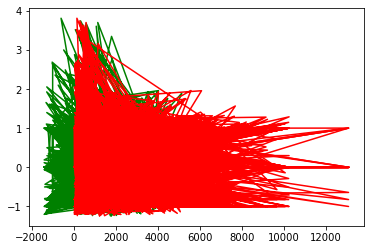

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr = LinearRegression().fit(X_train_fs,y_train)
y_pred = lr.predict(X_test_fs)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("Result :",lr.score(X_train_fs, y_train))
plt.plot(y_pred, X_test_fs, color = "green")
plt.plot(y_test, X_test_fs, color = "red")

plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train_fs, y_train)

# predicting the  test set results
y_pred = model.predict(X_test_fs)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train_fs, y_train))

[2253.66642   280.082086  828.268516 ...  918.850606 3691.754472
 2920.485094]
RMSE : 1152.2015250796444
Variance score: 0.55
Result : 0.9374975581536747


In [36]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_fs, y_train)

# predicting the test set results
y_pred = model.predict(X_test_fs)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[2343.616   369.519   773.6596 ...  798.96   9664.7528 1929.4884]
 RMSE :  1557.8384528112367
